# Matichon topic classification: data preprocessing
* Author: Natchanon Pollertlam
* Date: 2023-11-22

# Table of Contents
1. [Import Module](#import)
2. [Load Data](#loaddata)
3. [Exploratory Data Analysis (EDA)](#eda)
   1. [Word cloud](#wordcloud)

---

## Import Modules <a id="import"></a>
---

In [1]:
# import data preprocessing libraries
import pandas as pd
import numpy as np
import re
from collections import Counter

# pythainlp
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# tqdm for pandas
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

In [2]:
# matplotlib font
from matplotlib import font_manager

font_path = '../assets/font-lasagna/MN LASAGNA.ttf'  # font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = prop.get_name()


## Load Data <a id="loaddata"></a>
---
I use data from `../data/matichon.json` that contains approximately 16k articles of Thai news by Matichon between 2015-2018 <br>

In [3]:
df = pd.read_json('../data/matichon.json')
df # 17109 rows × 6 columns (headline, article, date, category, url, id)

,headline,article,date,category,url,id
0,ซาอุฯจ่อเปิดไฟเขียวให้สิทธิหญิงม่าย-หย่าร้างปก...,(2 ธ.ค.58) หนังสือพิมพ์อัล ริยาดของทางการซาอุด...,2015-12-04 03:35:18,foreign,https://www.matichon.co.th/foreign/news_293,293
1,"""ไก่อู""ชี้ ตู่-เต้น ไม่ได้มีหน้าที่ตรวจสอบทุจร...","""บิ๊กป้อม"" แจง ครม. มีความพยายามยุยงปลุกปั่นให...",2015-12-04 04:10:49,politics,https://www.matichon.co.th/politics/news_329,329
2,"เปิดใจ ""โบว์ แวนดา"" ระหว่างรอยิ้มได้เต็มที่ในว...",แม้จะทำหน้าที่ภรรยาที่ดีมาเฝ้าปอ – ทฤษฎี สหวงษ...,2015-12-04 06:30:11,entertainment,https://www.matichon.co.th/entertainment/news_375,375
3,"""นาย ณภัทร"" ปลื้มคนชมแชมป์ขึ้นปกนิตยสารแห่งปี ...",กลายเป็นดาราหนุ่มเนื้อหอมแฟนคลับแน่น กระแสมาแร...,2015-12-04 07:10:26,entertainment,https://www.matichon.co.th/entertainment/news_393,393
4,"คอแทบหัก! แม่ยกแห่คล้องพวงมาลัยักษ์ ""บอย ศิริช...",แสดงดีจนเป็นที่ถูกอกถูกใจแฟนคลับ จนได้รับพวงมา...,2015-12-05 05:26:20,entertainment,https://www.matichon.co.th/entertainment/news_445,445
...,...,...,...,...,...,...
17104,โบว์ ณัฏฐา แจ้งความ พล.ต.อ.ศรีวราห์ ถูกพาดพิง...,เมื่อวันที่ 5 ก.ค. ที่ สน.พญาไท น.ส.ณัฏฐา มหัท...,2018-07-05 13:25:45,politics,https://www.matichon.co.th/politics/news_1029607,1029607
17105,ภาพบรรยากาศ ขุดทางระบายน้ำ เร่งนำ 13 ชีวิตออกจ...,วันที่ 5 กรกฎาคม เจ้าหน้าที่ขุดทางระบายน้ำที่ด...,2018-07-05 13:33:10,region,https://www.matichon.co.th/region/news_1029619,1029619
17106,สนช.ผ่านพ.ร.บ.สงฆ์ 3 วาระรวด พระมหากษัตริย์ทรง...,"สนช.ผ่าน พ.ร.บ.สงฆ์ 3 วาระรวด ""วิษณุ"" แจงสาระส...",2018-07-05 13:33:27,politics,https://www.matichon.co.th/politics/news_1029636,1029636
17107,นานาทรรศนะเพิ่มค่าปรับหมอ 5ล้านบ. สกัดเบี้ยว...,หมายเหตุ – จากกรณีที่ กระทรวงศึกษาธิการ (ศธ.) ...,2018-07-05 13:53:26,education,https://www.matichon.co.th/education/news_1029668,1029668


## Exploratory Data Analysis <a id="eda"></a>
---
* TODO: 
1. check for missing values
2. check for duplicates
3. check for date and time of the data
4. check for category distribution
5. check for token length
6. plot wordcloud for each category (need to combine `headline` and `article`)

### Check data completeness: missing values, duplicates

In [7]:
df.dtypes

headline            object
article             object
date        datetime64[ns]
category            object
url                 object
id                   int64
dtype: object

In [4]:
# check for missing values
df.isnull().sum() # no missing values

headline    0
article     0
date        0
category    0
url         0
id          0
dtype: int64

In [5]:
# check for duplicates
print('Number of duplicates: ', df.duplicated().sum()) # 5 duplicates
print('-'*50)
df[df.duplicated(keep=False)] # show duplicates

Number of duplicates:  5
--------------------------------------------------


,headline,article,date,category,url,id
158,สานพลังประชารัฐ ยกระดับคุณภาพวิชาชีพอาชีวศึกษา,รัฐบาล เอกชน และภาคประชาสังคม ผนึกกำลังลงนามค...,2016-01-21 21:44:08,publicize,https://www.matichon.co.th/publicize/news_9171,9171
159,สานพลังประชารัฐ ยกระดับคุณภาพวิชาชีพอาชีวศึกษา,รัฐบาล เอกชน และภาคประชาสังคม ผนึกกำลังลงนามค...,2016-01-21 21:44:08,publicize,https://www.matichon.co.th/publicize/news_9171,9171
164,เสขระบุรองโฆษกก.ต.สหรัฐแค่แสดงความเห็นตามหลักก...,นายเสข วรรณเมธี อธิบดีกรมสารนิเทศและโฆษกกระทรว...,2016-01-21 23:35:58,foreign,https://www.matichon.co.th/foreign/news_9273,9273
165,เสขระบุรองโฆษกก.ต.สหรัฐแค่แสดงความเห็นตามหลักก...,นายเสข วรรณเมธี อธิบดีกรมสารนิเทศและโฆษกกระทรว...,2016-01-21 23:35:58,foreign,https://www.matichon.co.th/foreign/news_9273,9273
174,'กิเลน'เปิดตัวแนวรับแซมบ้า'ฟาบริซิโอ'-ประกาศพา...,"""กิเลนผยอง"" เอสซีจี เมืองทอง ยูไนเต็ด เสริมทัพ...",2016-01-22 11:20:50,sport,https://www.matichon.co.th/sport/news_9482,9482
175,'กิเลน'เปิดตัวแนวรับแซมบ้า'ฟาบริซิโอ'-ประกาศพา...,"""กิเลนผยอง"" เอสซีจี เมืองทอง ยูไนเต็ด เสริมทัพ...",2016-01-22 11:20:50,sport,https://www.matichon.co.th/sport/news_9482,9482
179,'ปลูกรักเพื่อชาติ' โปรเจ็กต์ที่'บอย โกสิยพงษ์'...,นอกจากงานเพลงที่ทำเป็นประจำกับการเป็นผู้จัดหน้...,2016-01-22 23:42:01,entertainment,https://www.matichon.co.th/entertainment/news_...,9533
180,'ปลูกรักเพื่อชาติ' โปรเจ็กต์ที่'บอย โกสิยพงษ์'...,นอกจากงานเพลงที่ทำเป็นประจำกับการเป็นผู้จัดหน้...,2016-01-22 23:42:01,entertainment,https://www.matichon.co.th/entertainment/news_...,9533
193,ทหาร-ตร.พระโขนงบุกจับบ่อนกลางกรุง อุปการณ์การเ...,เมื่อเวลา 13.00 น. วันที่ 22 มกราคม พ.ต.อ.นิพน...,2016-01-22 15:59:01,crime,https://www.matichon.co.th/local/crime/news_9923,9923
194,ทหาร-ตร.พระโขนงบุกจับบ่อนกลางกรุง อุปการณ์การเ...,เมื่อเวลา 13.00 น. วันที่ 22 มกราคม พ.ต.อ.นิพน...,2016-01-22 15:59:01,crime,https://www.matichon.co.th/local/crime/news_9923,9923


In [6]:
# drop duplicates
df.drop_duplicates(inplace=True)
print('DataFrame shape after dropping duplicates: ', df.shape) # 17104 rows × 6 columns

DataFrame shape after dropping duplicates:  (17104, 6)


### Check datetime

In [8]:
# sort dataframe by date
df.sort_values(by='date') # Data from 2015-08-26 to 2018-07-06

,headline,article,date,category,url,id
313,"The Hel(l)met Show EP.04 : ""สมคิด(เศรษฐกิจ)ดั่...","ติดตามรายการ ""The Hel(l)met Show หมวกกันน็อค"" ...",2015-08-26 16:53:02,politics,https://www.matichon.co.th/politics/news_17288,17288
315,The Hel(l)met Show EP.06 : รธน.ฟรีแลนซ์ รับก็อ...,"ติดตามรายการ ""The Hel(l)met Show หมวกกันน็อค"" ...",2015-08-31 17:07:59,politics,https://www.matichon.co.th/politics/news_17362,17362
327,The Hel(l)met Show EP.11 : ฟรีแลนซ์ คนดูอกหัก ...,"ติดตามรายการ ""The Hel(l)met Show หมวกกันน็อค"" ...",2015-09-11 13:50:55,politics,https://www.matichon.co.th/politics/news_18064,18064
328,The Hel(l)met Show EP.14 : สร้าง ทุบ ทุบ สร้าง...,"ติดตามรายการ ""The Hel(l)met Show หมวกกันน็อค"" ...",2015-09-21 15:23:57,politics,https://www.matichon.co.th/politics/news_18169,18169
331,The Hel(l)met Show EP.15 : ผลการเลือกตั้งสิงคโ...,"ติดตามรายการ ""The Hel(l)met Show หมวกกันน็อค"" ...",2015-09-23 15:38:06,politics,https://www.matichon.co.th/politics/news_18201,18201
...,...,...,...,...,...,...
17105,ภาพบรรยากาศ ขุดทางระบายน้ำ เร่งนำ 13 ชีวิตออกจ...,วันที่ 5 กรกฎาคม เจ้าหน้าที่ขุดทางระบายน้ำที่ด...,2018-07-05 13:33:10,region,https://www.matichon.co.th/region/news_1029619,1029619
17106,สนช.ผ่านพ.ร.บ.สงฆ์ 3 วาระรวด พระมหากษัตริย์ทรง...,"สนช.ผ่าน พ.ร.บ.สงฆ์ 3 วาระรวด ""วิษณุ"" แจงสาระส...",2018-07-05 13:33:27,politics,https://www.matichon.co.th/politics/news_1029636,1029636
17107,นานาทรรศนะเพิ่มค่าปรับหมอ 5ล้านบ. สกัดเบี้ยว...,หมายเหตุ – จากกรณีที่ กระทรวงศึกษาธิการ (ศธ.) ...,2018-07-05 13:53:26,education,https://www.matichon.co.th/education/news_1029668,1029668
17108,วอน!! นายก ส.ปส.กช.ชง 'บิ๊กจิน' ช่วย น.ร.เอกชน...,เมื่อวันที่ 5 กรกรฎาคม นายศุภเสฏฐ์ คณากูล นายก...,2018-07-06 04:46:18,education,https://www.matichon.co.th/education/news_1029858,1029858


### Inspect Y variable: category distribution

In [7]:
# check categories
df['category'].value_counts() # 10 categories: politics, region, crime, local, publicize, foreign, economy, sport, education, entertainment

category
politics         3135
region           2655
crime            2140
local            1938
publicize        1480
foreign          1328
economy          1249
sport            1201
education        1053
entertainment     925
Name: count, dtype: int64

c:\Users\bigbo\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bigbo\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bigbo\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


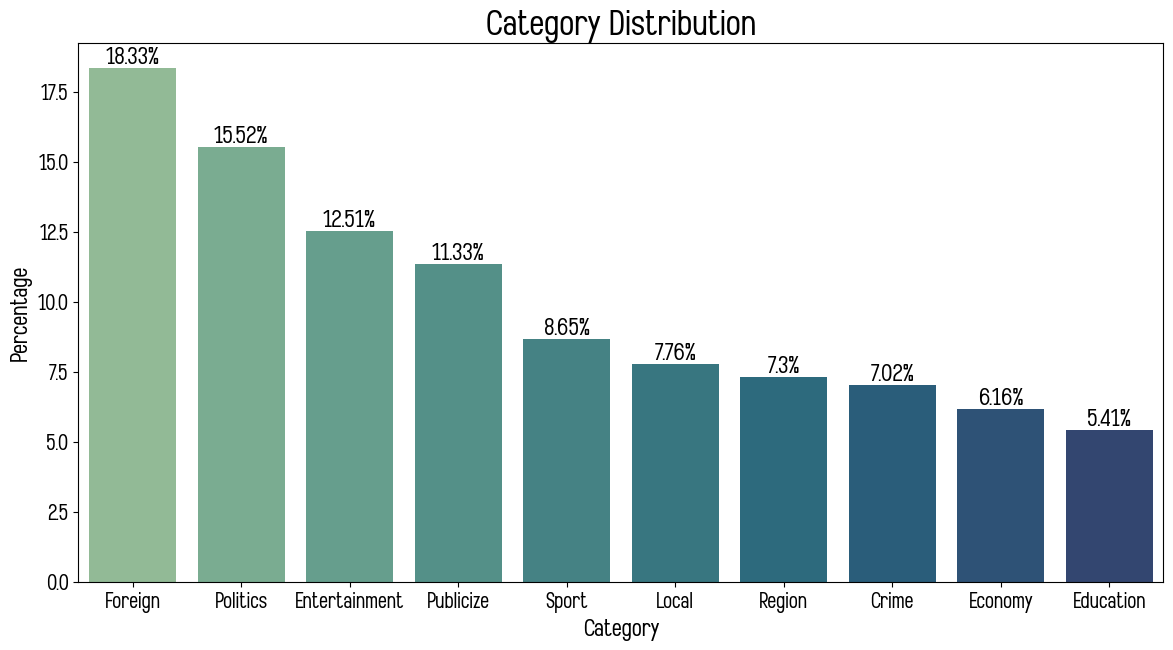

In [9]:
# plot category distribution in percentage
plt.figure(figsize=(14, 7))
sns.barplot(x=df['category'].map(lambda x: x.capitalize()).unique(), # Capitalize first letter of each word by using str.capitalize()
             y=np.round(df['category'].value_counts(normalize=True) * 100, 2), palette='crest')

# Set title, x-label, y-label
plt.title('Category Distribution', fontsize=30)
plt.xlabel('Category', fontsize=20)
plt.ylabel('Percentage', fontsize=20)

# Set font size for x-axis and y-axis
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# show percentage on top of each bar
for i, v in enumerate(np.round(df['category'].value_counts(normalize=True) * 100, 2)):
    plt.text(i, v, str(v) + '%', ha='center', va='bottom', fontsize=20)


# Save figure
plt.savefig('../figure/category_distribution.png', dpi=300, bbox_inches='tight')

plt.show()

### Tokenize text

In [24]:
# tokenize headline
df['tokenized_headline'] = df['headline'].progress_apply(lambda x: word_tokenize(x, engine='newmm'))

# tokenize article
df['tokenized_article'] = df['article'].progress_apply(lambda x: word_tokenize(x, engine='newmm'))



  0%|          | 0/17104 [00:00<?, ?it/s]

  0%|          | 0/17104 [00:00<?, ?it/s]

In [25]:
# combine tokenized headline and tokenized article
df['tokenized_text'] = df['tokenized_headline'] + df['tokenized_article']
df

,headline,article,date,category,url,id,tokenized_headline,tokenized_article,tokenized_text
0,ซาอุฯจ่อเปิดไฟเขียวให้สิทธิหญิงม่าย-หย่าร้างปก...,(2 ธ.ค.58) หนังสือพิมพ์อัล ริยาดของทางการซาอุด...,2015-12-04 03:35:18,foreign,https://www.matichon.co.th/foreign/news_293,293,"[ซาอุฯ, จ่อ, เปิดไฟเขียว, ให้, สิทธิ, หญิง, ม่...","[(, 2, , ธ.ค., 58, ), , หนังสือพิมพ์, อัล, ...","[ซาอุฯ, จ่อ, เปิดไฟเขียว, ให้, สิทธิ, หญิง, ม่..."
1,"""ไก่อู""ชี้ ตู่-เต้น ไม่ได้มีหน้าที่ตรวจสอบทุจร...","""บิ๊กป้อม"" แจง ครม. มีความพยายามยุยงปลุกปั่นให...",2015-12-04 04:10:49,politics,https://www.matichon.co.th/politics/news_329,329,"["", ไก่อู, "", ชี้, , ตู่, -, เต้น, , ไม่, ได...","["", บิ๊ก, ป้อม, "", , แจง, , ครม., , มี, ควา...","["", ไก่อู, "", ชี้, , ตู่, -, เต้น, , ไม่, ได..."
2,"เปิดใจ ""โบว์ แวนดา"" ระหว่างรอยิ้มได้เต็มที่ในว...",แม้จะทำหน้าที่ภรรยาที่ดีมาเฝ้าปอ – ทฤษฎี สหวงษ...,2015-12-04 06:30:11,entertainment,https://www.matichon.co.th/entertainment/news_375,375,"[เปิดใจ, , "", โบว์, , แวนดา, "", , ระหว่าง, ...","[แม้, จะ, ทำหน้าที่, ภรรยา, ที่, ดี, มา, เฝ้า,...","[เปิดใจ, , "", โบว์, , แวนดา, "", , ระหว่าง, ..."
3,"""นาย ณภัทร"" ปลื้มคนชมแชมป์ขึ้นปกนิตยสารแห่งปี ...",กลายเป็นดาราหนุ่มเนื้อหอมแฟนคลับแน่น กระแสมาแร...,2015-12-04 07:10:26,entertainment,https://www.matichon.co.th/entertainment/news_393,393,"["", นาย, , ณ, ภัทร, "", , ปลื้ม, คน, ชม, แชมป...","[กลายเป็น, ดารา, หนุ่ม, เนื้อ, หอม, แฟนคลับ, แ...","["", นาย, , ณ, ภัทร, "", , ปลื้ม, คน, ชม, แชมป..."
4,"คอแทบหัก! แม่ยกแห่คล้องพวงมาลัยักษ์ ""บอย ศิริช...",แสดงดีจนเป็นที่ถูกอกถูกใจแฟนคลับ จนได้รับพวงมา...,2015-12-05 05:26:20,entertainment,https://www.matichon.co.th/entertainment/news_445,445,"[คอ, แทบ, หัก, !, , แม่ยก, แห่, คล้อง, พวงมาล...","[แสดง, ดี, จน, เป็นที่, ถูกอกถูกใจ, แฟนคลับ, ...","[คอ, แทบ, หัก, !, , แม่ยก, แห่, คล้อง, พวงมาล..."
...,...,...,...,...,...,...,...,...,...
17104,โบว์ ณัฏฐา แจ้งความ พล.ต.อ.ศรีวราห์ ถูกพาดพิง...,เมื่อวันที่ 5 ก.ค. ที่ สน.พญาไท น.ส.ณัฏฐา มหัท...,2018-07-05 13:25:45,politics,https://www.matichon.co.th/politics/news_1029607,1029607,"[โบว์, , ณัฏฐา, , แจ้งความ, , พล.ต.อ., ศรี...","[เมื่อ, วันที่, , 5, , ก.ค., , ที่, , สน.,...","[โบว์, , ณัฏฐา, , แจ้งความ, , พล.ต.อ., ศรี..."
17105,ภาพบรรยากาศ ขุดทางระบายน้ำ เร่งนำ 13 ชีวิตออกจ...,วันที่ 5 กรกฎาคม เจ้าหน้าที่ขุดทางระบายน้ำที่ด...,2018-07-05 13:33:10,region,https://www.matichon.co.th/region/news_1029619,1029619,"[ภาพ, บรรยากาศ, , ขุด, ทาง, ระบาย, น้ำ, , เร...","[วันที่, , 5, , กรกฎาคม, , เจ้าหน้าที่, ขุด...","[ภาพ, บรรยากาศ, , ขุด, ทาง, ระบาย, น้ำ, , เร..."
17106,สนช.ผ่านพ.ร.บ.สงฆ์ 3 วาระรวด พระมหากษัตริย์ทรง...,"สนช.ผ่าน พ.ร.บ.สงฆ์ 3 วาระรวด ""วิษณุ"" แจงสาระส...",2018-07-05 13:33:27,politics,https://www.matichon.co.th/politics/news_1029636,1029636,"[สนช, ., ผ่าน, พ.ร.บ., สงฆ์, , 3, , วาระ, รว...","[สนช, ., ผ่าน, , พ.ร.บ., สงฆ์, , 3, , วาระ,...","[สนช, ., ผ่าน, พ.ร.บ., สงฆ์, , 3, , วาระ, รว..."
17107,นานาทรรศนะเพิ่มค่าปรับหมอ 5ล้านบ. สกัดเบี้ยว...,หมายเหตุ – จากกรณีที่ กระทรวงศึกษาธิการ (ศธ.) ...,2018-07-05 13:53:26,education,https://www.matichon.co.th/education/news_1029668,1029668,"[นานา, ทรรศนะ, เพิ่ม, ค่าปรับ, , หมอ, , , 5...","[หมายเหตุ, , –, , จาก, กรณี, ที่, , กระทรวง...","[นานา, ทรรศนะ, เพิ่ม, ค่าปรับ, , หมอ, , , 5..."


In [36]:
# create a function to remove stopwords and punctuation and space
def clean_text(text, stopwords=thai_stopwords()):
    # keep only Thai/English words and numbers
    text = [word for word in text if re.match(r'[A-zก-ไ0-9][A-zก-๙\.0-9]*', word.strip())] # using ก-ไ to remove tokens that start with a tone marker

    # remove stopwords
    result = [word for word in text if word not in stopwords]

    # remove punctuation and space using regex
    result = [re.sub(r'[!\"#$%&\'()*+,\-/:;<=>?@\[\]^_`{|}~\s]+', '', word) for word in result]

    # remove empty string
    result = [word for word in result if word != '']

    return result

In [37]:
tokenized_columns = ['tokenized_headline', 'tokenized_article', 'tokenized_text']

# clean tokenized text
for column in tokenized_columns:
    df['cleaned_' + column] = df[column].progress_apply(clean_text)

df

  0%|          | 0/17104 [00:00<?, ?it/s]

  0%|          | 0/17104 [00:00<?, ?it/s]

  0%|          | 0/17104 [00:00<?, ?it/s]

,headline,article,date,category,url,id,tokenized_headline,tokenized_article,tokenized_text,cleaned_tokenized_headline,cleaned_tokenized_article,cleaned_tokenized_text
0,ซาอุฯจ่อเปิดไฟเขียวให้สิทธิหญิงม่าย-หย่าร้างปก...,(2 ธ.ค.58) หนังสือพิมพ์อัล ริยาดของทางการซาอุด...,2015-12-04 03:35:18,foreign,https://www.matichon.co.th/foreign/news_293,293,"[ซาอุฯ, จ่อ, เปิดไฟเขียว, ให้, สิทธิ, หญิง, ม่...","[(, 2, , ธ.ค., 58, ), , หนังสือพิมพ์, อัล, ...","[ซาอุฯ, จ่อ, เปิดไฟเขียว, ให้, สิทธิ, หญิง, ม่...","[ซาอุฯ, จ่อ, เปิดไฟเขียว, สิทธิ, หญิง, ม่าย, ห...","[2, ธ.ค., 58, หนังสือพิมพ์, อัล, ริยาด, ทางการ...","[ซาอุฯ, จ่อ, เปิดไฟเขียว, สิทธิ, หญิง, ม่าย, ห..."
1,"""ไก่อู""ชี้ ตู่-เต้น ไม่ได้มีหน้าที่ตรวจสอบทุจร...","""บิ๊กป้อม"" แจง ครม. มีความพยายามยุยงปลุกปั่นให...",2015-12-04 04:10:49,politics,https://www.matichon.co.th/politics/news_329,329,"["", ไก่อู, "", ชี้, , ตู่, -, เต้น, , ไม่, ได...","["", บิ๊ก, ป้อม, "", , แจง, , ครม., , มี, ควา...","["", ไก่อู, "", ชี้, , ตู่, -, เต้น, , ไม่, ได...","[ไก่อู, ชี้, ตู่, เต้น, หน้าที่, ตรวจสอบ, ทุจร...","[บิ๊ก, ป้อม, แจง, ครม., ความพยายาม, ยุยง, ปลุก...","[ไก่อู, ชี้, ตู่, เต้น, หน้าที่, ตรวจสอบ, ทุจร..."
2,"เปิดใจ ""โบว์ แวนดา"" ระหว่างรอยิ้มได้เต็มที่ในว...",แม้จะทำหน้าที่ภรรยาที่ดีมาเฝ้าปอ – ทฤษฎี สหวงษ...,2015-12-04 06:30:11,entertainment,https://www.matichon.co.th/entertainment/news_375,375,"[เปิดใจ, , "", โบว์, , แวนดา, "", , ระหว่าง, ...","[แม้, จะ, ทำหน้าที่, ภรรยา, ที่, ดี, มา, เฝ้า,...","[เปิดใจ, , "", โบว์, , แวนดา, "", , ระหว่าง, ...","[เปิดใจ, โบว์, แวนดา, รอ, ยิ้ม, เต็มที่, วันที...","[ทำหน้าที่, ภรรยา, ดี, เฝ้า, ปอ, ทฤษฎี, สห, วง...","[เปิดใจ, โบว์, แวนดา, รอ, ยิ้ม, เต็มที่, วันที..."
3,"""นาย ณภัทร"" ปลื้มคนชมแชมป์ขึ้นปกนิตยสารแห่งปี ...",กลายเป็นดาราหนุ่มเนื้อหอมแฟนคลับแน่น กระแสมาแร...,2015-12-04 07:10:26,entertainment,https://www.matichon.co.th/entertainment/news_393,393,"["", นาย, , ณ, ภัทร, "", , ปลื้ม, คน, ชม, แชมป...","[กลายเป็น, ดารา, หนุ่ม, เนื้อ, หอม, แฟนคลับ, แ...","["", นาย, , ณ, ภัทร, "", , ปลื้ม, คน, ชม, แชมป...","[ภัทร, ปลื้ม, คน, ชม, แชมป์, ปก, นิตยสาร, ปี, ...","[กลายเป็น, ดารา, หนุ่ม, เนื้อ, หอม, แฟนคลับ, แ...","[ภัทร, ปลื้ม, คน, ชม, แชมป์, ปก, นิตยสาร, ปี, ..."
4,"คอแทบหัก! แม่ยกแห่คล้องพวงมาลัยักษ์ ""บอย ศิริช...",แสดงดีจนเป็นที่ถูกอกถูกใจแฟนคลับ จนได้รับพวงมา...,2015-12-05 05:26:20,entertainment,https://www.matichon.co.th/entertainment/news_445,445,"[คอ, แทบ, หัก, !, , แม่ยก, แห่, คล้อง, พวงมาล...","[แสดง, ดี, จน, เป็นที่, ถูกอกถูกใจ, แฟนคลับ, ...","[คอ, แทบ, หัก, !, , แม่ยก, แห่, คล้อง, พวงมาล...","[คอ, แทบ, หัก, แม่ยก, แห่, คล้อง, พวงมาลัย, ัก...","[ดี, ถูกอกถูกใจ, แฟนคลับ, พวงมาลัย, แบงก์, สด,...","[คอ, แทบ, หัก, แม่ยก, แห่, คล้อง, พวงมาลัย, ัก..."
...,...,...,...,...,...,...,...,...,...,...,...,...
17104,โบว์ ณัฏฐา แจ้งความ พล.ต.อ.ศรีวราห์ ถูกพาดพิง...,เมื่อวันที่ 5 ก.ค. ที่ สน.พญาไท น.ส.ณัฏฐา มหัท...,2018-07-05 13:25:45,politics,https://www.matichon.co.th/politics/news_1029607,1029607,"[โบว์, , ณัฏฐา, , แจ้งความ, , พล.ต.อ., ศรี...","[เมื่อ, วันที่, , 5, , ก.ค., , ที่, , สน.,...","[โบว์, , ณัฏฐา, , แจ้งความ, , พล.ต.อ., ศรี...","[โบว์, ณัฏฐา, แจ้งความ, พล.ต.อ., ศรี, วราห์, พ...","[วันที่, 5, ก.ค., สน., พญาไท, น.ส., ณัฏฐา, มหั...","[โบว์, ณัฏฐา, แจ้งความ, พล.ต.อ., ศรี, วราห์, พ..."
17105,ภาพบรรยากาศ ขุดทางระบายน้ำ เร่งนำ 13 ชีวิตออกจ...,วันที่ 5 กรกฎาคม เจ้าหน้าที่ขุดทางระบายน้ำที่ด...,2018-07-05 13:33:10,region,https://www.matichon.co.th/region/news_1029619,1029619,"[ภาพ, บรรยากาศ, , ขุด, ทาง, ระบาย, น้ำ, , เร...","[วันที่, , 5, , กรกฎาคม, , เจ้าหน้าที่, ขุด...","[ภาพ, บรรยากาศ, , ขุด, ทาง, ระบาย, น้ำ, , เร...","[ภาพ, บรรยากาศ, ขุด, ระบาย, น้ำ, เร่ง, 13, ชีว...","[วันที่, 5, กรกฎาคม, เจ้าหน้าที่, ขุด, ระบาย, ...","[ภาพ, บรรยากาศ, ขุด, ระบาย, น้ำ, เร่ง, 13, ชีว..."
17106,สนช.ผ่านพ.ร.บ.สงฆ์ 3 วาระรวด พระมหากษัตริย์ทรง...,"สนช.ผ่าน พ.ร.บ.สงฆ์ 3 วาระรวด ""วิษณุ"" แจงสาระส...",2018-07-05 13:33:27,politics,https://www.matichon.co.th/politics/news_1029636,1029636,"[สนช, ., ผ่าน, พ.ร.บ., สงฆ์, , 3, , วาระ, รว...","[สนช, ., ผ่าน, , พ.ร.บ., สงฆ์, , 3, , วาระ,...","[สน

### Check the number of tokens in each text

In [39]:
# Check the number of tokens in each text
df['num_tokens'] = df['cleaned_tokenized_text'].apply(len)
np.round(df['num_tokens'].describe(), 2) # min: 21, max: 3660, mean: 228.27, median: 193.0

count    17104.00
mean       228.27
std        154.87
min         21.00
25%        137.00
50%        193.00
75%        275.00
max       3660.00
Name: num_tokens, dtype: float64

In [42]:
# text with 21 tokens seems to be very short, let's check it out
df[(df['num_tokens'] >= 21) & (df['num_tokens'] <= 30)].sort_values(by='num_tokens')

# this seems to be a valid text, so we will keep it

,headline,article,date,category,url,id,tokenized_headline,tokenized_article,tokenized_text,cleaned_tokenized_headline,cleaned_tokenized_article,cleaned_tokenized_text,num_tokens
2904,เริ่มแล้ว!!! มติชน เกาะติดมหกรรมแข้ง Euro 2016,"คลิกที่แบนเนอร์ สัญลักษณ์ "" เกาะติดยูโร "" ในเว...",2016-06-04 09:36:49,sport,https://www.matichon.co.th/sport/news_159963,159963,"[เริ่ม, แล้ว, !!!, , มติชน, , เกาะติด, มหกรร...","[คลิก, ที่, แบนเนอร์, , สัญลักษณ์, , "", , เ...","[เริ่ม, แล้ว, !!!, , มติชน, , เกาะติด, มหกรร...","[มติชน, เกาะติด, มหกรรม, แข้ง, Euro, 2016]","[คลิก, แบนเนอร์, สัญลักษณ์, เกาะติด, ยูโร, เว็...","[มติชน, เกาะติด, มหกรรม, แข้ง, Euro, 2016, คลิ...",21
12201,แก๊สชีวภาพ ติดตั้งง่าย ราคาไม่แพง ชาวบ้านก็ทำได้,ทำแก๊สชีวภาพ ทำได้ง่ายๆ ลดการใช้ LPG และยังมีป...,2017-08-17 10:00:31,publicize,https://www.matichon.co.th/publicize/news_630745,630745,"[แก๊สชีวภาพ, , ติดตั้ง, ง่าย, , ราคา, ไม่, แ...","[ทำ, แก๊สชีวภาพ, , ทำได้, ง่ายๆ, , ลด, การ, ...","[แก๊สชีวภาพ, , ติดตั้ง, ง่าย, , ราคา, ไม่, แ...","[แก๊สชีวภาพ, ติดตั้ง, ราคา, แพง, ชาวบ้าน, ทำได้]","[ทำ, แก๊สชีวภาพ, ทำได้, ลด, LPG, มีประสิทธิภาพ...","[แก๊สชีวภาพ, ติดตั้ง, ราคา, แพง, ชาวบ้าน, ทำได...",23
14841,"ชมภาพ ""ซุปเปอร์บลูบลัดมูน"" จากทั่วโลก","ชมปรากฏการณ์ ""ซุปเปอร์บลูบลัดมูน"" จันทรุปราคาเ...",2018-01-31 19:27:05,foreign,https://www.matichon.co.th/foreign/news_824131,824131,"[ชม, ภาพ, , "", ซุปเปอร์, บลู, บ, ลัด, มูน, "",...","[ชม, ปรากฏการณ์, , "", ซุปเปอร์, บลู, บ, ลัด, ...","[ชม, ภาพ, , "", ซุปเปอร์, บลู, บ, ลัด, มูน, "",...","[ชม, ภาพ, ซุปเปอร์, บลู, บ, ลัด, มูน, ทั่วโลก]","[ชม, ปรากฏการณ์, ซุปเปอร์, บลู, บ, ลัด, มูน, จ...","[ชม, ภาพ, ซุปเปอร์, บลู, บ, ลัด, มูน, ทั่วโลก,...",25
9618,อ่านกลอน สุจิตต์ วงษ์เทศ : หลอกคนอื่นหลอกตัวเ...,บรรพชนคนไทยหลายเผ่าพันธุ์\nผสมปนเปกันร้อยพ่อพั...,2017-03-26 16:17:48,politics,https://www.matichon.co.th/politics/news_508515,508515,"[อ่าน, กลอน, , สุ, จิตต์, , วงษ์, เทศ, , :,...","[บรรพชน, คนไทย, หลาย, เผ่าพันธุ์, \n, ผสม, ปนเ...","[อ่าน, กลอน, , สุ, จิตต์, , วงษ์, เทศ, , :,...","[อ่าน, กลอน, สุ, จิตต์, วงษ์, เทศ, หลอก, คนอื่...","[บรรพชน, คนไทย, เผ่าพันธุ์, ผสม, ปนเป, ร้อย, พ...","[อ่าน, กลอน, สุ, จิตต์, วงษ์, เทศ, หลอก, คนอื่...",26
1400,ทองในปท.เช้านี้ราคาคงที่ ทองรูปพรรณขายออกบาทละ...,21 มีนาคม 2559 สมาคมค้าทองคำประกาศราคาซื้อขายท...,2016-03-21 09:28:49,economy,https://www.matichon.co.th/economy/news_77388,77388,"[ทอง, ใน, ปท., เช้านี้, ราคา, คงที่, , ทองรูป...","[21, , มีนาคม, , 2559, , สมาคม, ค้า, ทอง, ค...","[ทอง, ใน, ปท., เช้านี้, ราคา, คงที่, , ทองรูป...","[ทอง, ปท., เช้านี้, ราคา, คงที่, ทองรูปพรรณ, ข...","[21, มีนาคม, 2559, สมาคม, ค้า, ทอง, คำประกาศ, ...","[ทอง, ปท., เช้านี้, ราคา, คงที่, ทองรูปพรรณ, ข...",27
1907,บรรยากาศล่าสุด สงกรานต์ 'ถนนข้าวสาร' สุดคึกคัก...,เมื่อวันที่ 13 เมษายน ผู้สื่อข่าวรายงานบรรยากา...,2016-04-13 16:12:11,local,https://www.matichon.co.th/local/news_105177,105177,"[บรรยากาศ, ล่าสุด, , สงกรานต์, , ', ถนน, ข้า...","[เมื่อ, วันที่, , 13, , เมษายน, , ผู้สื่อข่...","[บรรยากาศ, ล่าสุด, , สงกรานต์, , ', ถนน, ข้า...","[บรรยากาศ, สงกรานต์, ถนน, ข้าวสาร, คึกคัก, คลิป]","[วันที่, 13, เมษายน, ผู้สื่อข่าว, รายงาน, บรรย...","[บรรยากาศ, สงกรานต์, ถนน, ข้าวสาร, คึกคัก, คลิ...",28
10686,ทุนการศึกษารัฐบาลออสเตรเลียเปิดรับสมัครแล้ว,สถานทูตออสเตรเลียขอแจ้งข่าวเรื่องทุนการศึกษาเอ...,2017-05-09 10:42:43,education,https://www.matichon.co.th/education/news_554945,554945,"[ทุนการศึกษา, รัฐบาล, ออสเตรเลีย, เปิด, รับสมั...","[สถานทูต, ออสเตรเลีย, ขอ, แจ้ง, ข่าว, เรื่อง, ...","[ทุนการศึกษา, รัฐบาล, ออสเตรเลีย, เปิด, รับสมั...","[ทุนการศึกษา, รัฐบาล, ออสเตรเลีย, รับสมัคร]","[สถานทูต, ออสเตรเลีย, แจ้ง, ข่าว, เรื่อง, ทุนก...","[ทุนการศึกษา, รัฐบาล, ออสเตรเลีย, รับสมัคร, สถ...",29
1325,ทองในปท.เช้านี้ปรับขึ้น 200 บาท ทองรูปพรรณขายอ...,17 มีนาคม 2559 สมาคมค้าทองคำประกาศราคาซื้อขายท...,2016-03-17 09:37:40,economy,https://www.matichon.co.th/economy/news_73381,73381,"[ทอง, ใน, ปท., เช้านี้, ปรับ, ขึ้น, , 200, ,...","[17, , มีนาคม, , 2559, , สมาคม, ค้า, ทอง, ค...","[ทอง, ใน, ปท., เช้านี้, ปรับ, ขึ้น, , 200, ,...","[ทอง, ปท., เช้านี้, 200, บา

### Word cloud <a id="wordcloud"></a>
---

#### Create category to word frequency dictionaries

In [47]:
# create a dictionaary that key is category and value is tokenized text
category_to_tokenized_text = dict()
for category in df['category'].unique(): # iterate through each category
    for text in df[df['category'] == category]['cleaned_tokenized_text']: # iterate through each tokenized text in each category
        if category in category_to_tokenized_text: # if category already in dictionary, extend tokenized text to the existing list
            category_to_tokenized_text[category].extend(text)
        else: # else create a new list of the tokenized_text for the category
            category_to_tokenized_text[category] = text

category_to_tokenized_text

{'foreign': ['ซาอุฯ',
  'จ่อ',
  'เปิดไฟเขียว',
  'สิทธิ',
  'หญิง',
  'ม่าย',
  'หย่าร้าง',
  'ปกครอง',
  'ครอบครัว',
  'ตัวเอง',
  '2',
  'ธ.ค.',
  '58',
  'หนังสือพิมพ์',
  'อัล',
  'ริยาด',
  'ทางการ',
  'ซาอุดีอาระเบีย',
  'รายงาน',
  'รัฐบาล',
  'ซาอุฯ',
  'ผู้หญิง',
  'ซาอุฯ',
  'หย่าร้าง',
  'ม่าย',
  'สิทธิ',
  'ทางกฎหมาย',
  'ดูแล',
  'ปกครอง',
  'ครอบครัว',
  'ไม่ต้อง',
  'ขอความเห็นชอบ',
  'ชาย',
  'อำนาจศาล',
  'อีกต่อไป',
  'กระทรวงมหาดไทย',
  'ซาอุฯ',
  'บัตรประจำตัว',
  'บัตร',
  'สถานะ',
  'ครอบครัว',
  'มอบให้',
  'ผู้ปกครอง',
  'ชาย',
  'ผู้หญิง',
  'หย่าร้าง',
  'ม่าย',
  'แสดงถึง',
  'สิทธิ',
  'อำนาจ',
  'ดูแล',
  'สมาชิก',
  'ครอบครัว',
  'เข้าถึง',
  'ประวัติ',
  'ข้อมูล',
  'การนำ',
  'ลูก',
  'โรงเรียน',
  'การรักษา',
  'ทางการแพทย์',
  'อย่างไรก็ดี',
  'สื่อ',
  'ทางการ',
  'ซาอุฯ',
  'ฉบับ',
  'รายละเอียด',
  'ถึงกำหนด',
  'วันที่',
  'มาตรการ',
  'มีผลบังคับใช้',
  'ถือเป็น',
  'ย่างก้าว',
  'ยกระดับ',
  'สิทธิสตรี',
  'ในประเทศ',
  'ซาอุฯ',
  'จำกัด',
  'ส

In [48]:
# Convert lists of tokenized text in each category to Counter object
category_to_word_frequency = dict()
for category, tokenized_text in category_to_tokenized_text.items():
    category_to_word_frequency[category] = Counter(tokenized_text)

category_to_word_frequency

{'foreign': Counter({'ปี': 1919,
          'คน': 1780,
          'ระบุ': 1700,
          'วันที่': 1667,
          'ประเทศ': 1616,
          'รายงาน': 1586,
          'สหรัฐ': 1213,
          'ที่ผ่านมา': 996,
          'ที่จะ': 917,
          'ทรัมป์': 882,
          'จีน': 878,
          'ประธานาธิบดี': 820,
          '2': 795,
          'ไทย': 762,
          'รัฐบาล': 745,
          'เกาหลีเหนือ': 724,
          'เมือง': 714,
          'สำนักข่าว': 683,
          'ล้าน': 641,
          'เรื่อง': 640,
          'เจ้าหน้าที่': 596,
          'รัฐ': 593,
          '3': 573,
          'กรุง': 567,
          'ประกาศ': 554,
          'เกิดขึ้น': 549,
          'เดือน': 548,
          'ทำ': 527,
          'ออกมา': 527,
          'โลก': 523,
          'สหรัฐอเมริกา': 521,
          'อังกฤษ': 508,
          'พื้นที่': 504,
          '1': 490,
          'ข่าว': 485,
          'ญี่ปุ่น': 481,
          'ส': 468,
          'เอเอฟพี': 467,
          'เดินทาง': 454,
          'ราว': 451,
        

#### Generate wordclouds

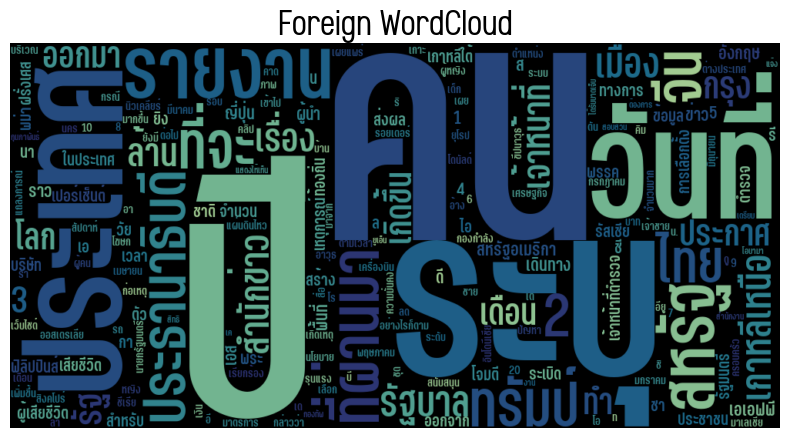

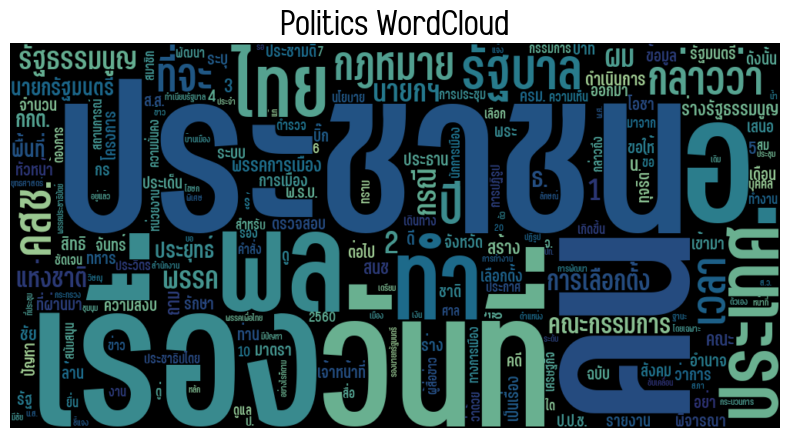

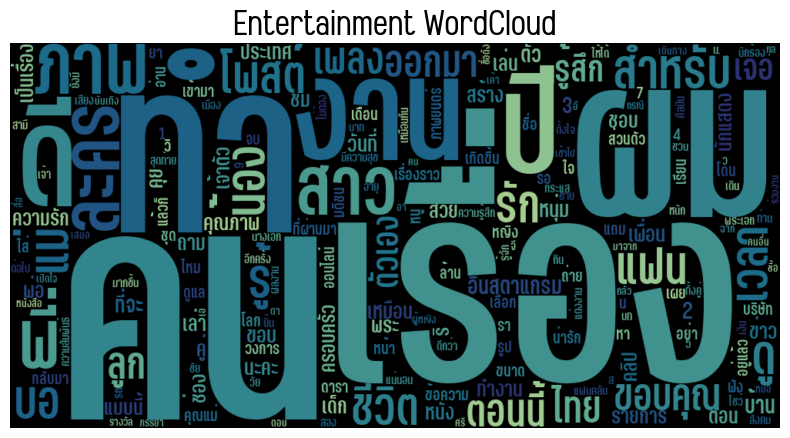

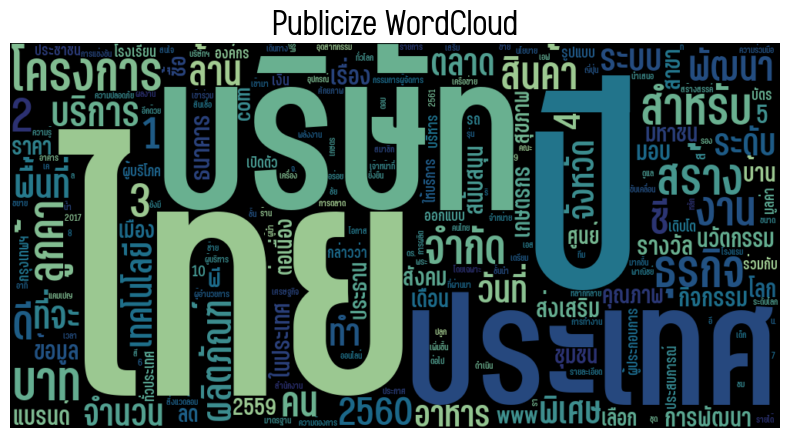

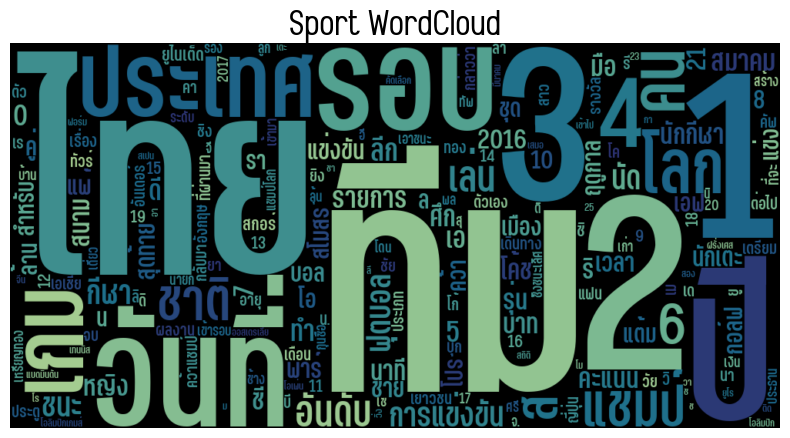

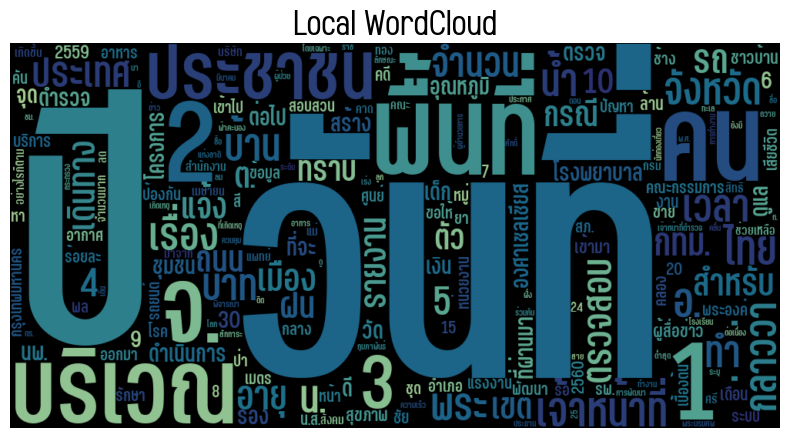

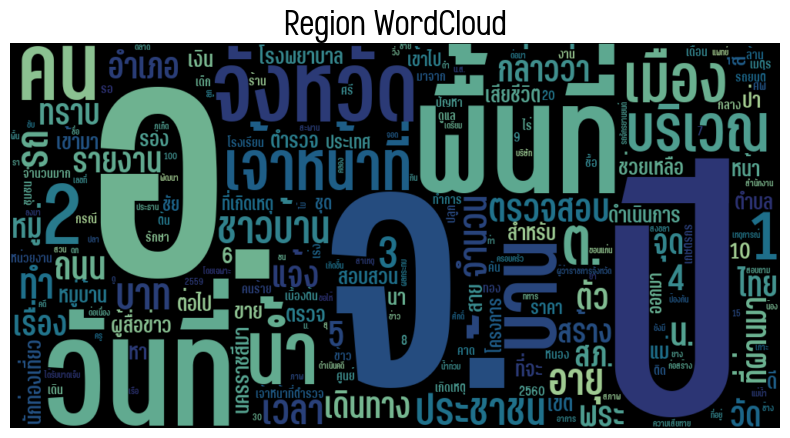

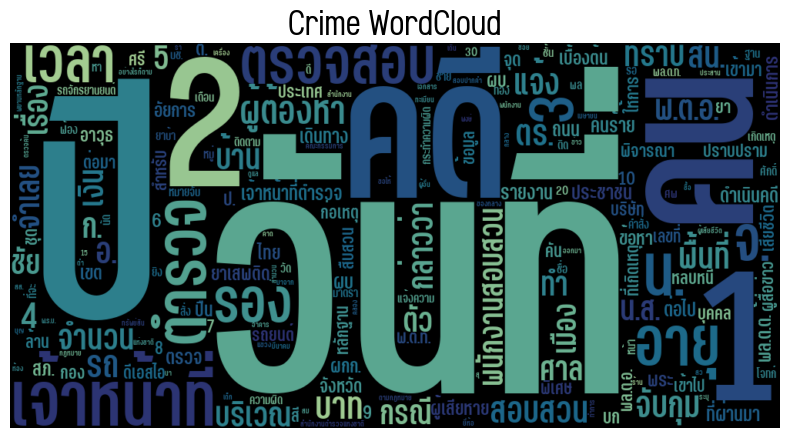

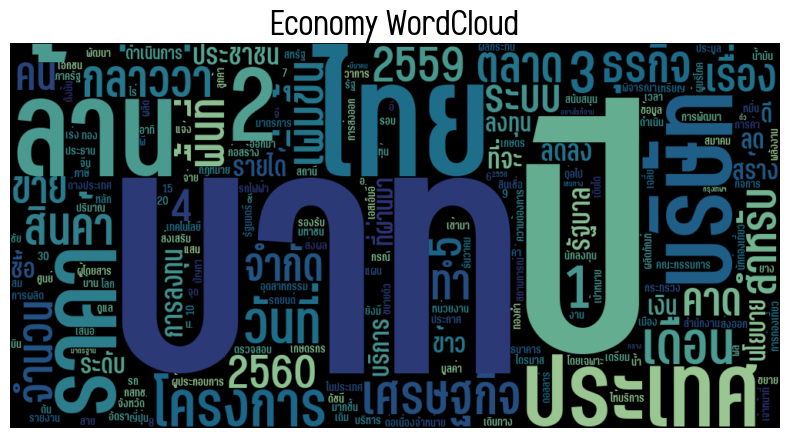

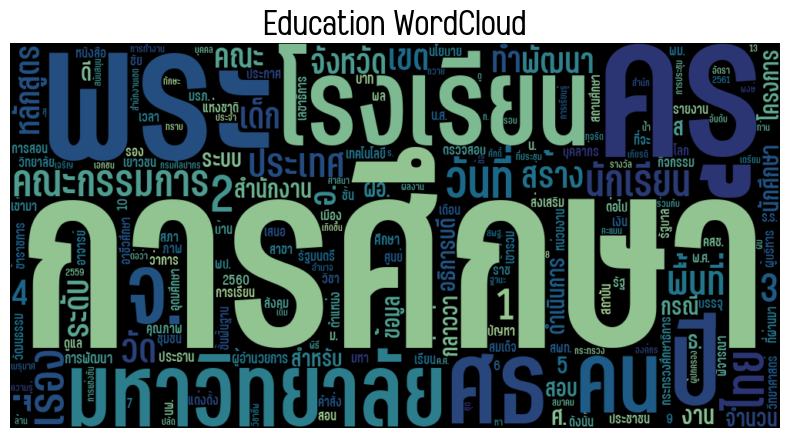

In [52]:
# generate wordcloud for each category
for category, word_frequency in category_to_word_frequency.items():
    wc = WordCloud(width=1000, 
                   height=500,
                   font_path='../assets/font-lasagna/MN LASAGNA Bold.ttf',
                   colormap='crest',
                   regexp = r'[ก-๙A-z0-9][ก-๙A-z0-9]+'
                   ).generate_from_frequencies(word_frequency)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(category.capitalize() + ' WordCloud', fontsize=30)
    plt.savefig('../figure/wordclouds/' + category + '-wordcloud.png')
    plt.show()


# Interesting findings:
# 1. The words appearing in `local` and `region` wordclouds are nearly the same.
#    This is because the news in `local` category is about the news in Thailand.
#    On the other hand, The news in `region` category is about the news in Thailand countryside.
# 2. The news in `crime` category may be confusing with the news in `local` category and `region` category.
#    This is because the news in `local` category and `region` category may be about the crime in Thailand.

# This can be inspected further by implementing a predictive model such as Logistic Regression with DictVectorizer.

### Save dataframe to json

In [57]:
df.to_json('../data/matichon_cleaned.json', orient='records', force_ascii=False)